In [1]:
# test split

In [1]:
import os
import random
import shutil

def copy_random_images(src_folder, dest_folder, num_images=100):
    """
    Randomly selects a specified number of images from the source folder and copies them to the destination folder.

    :param src_folder: Path to the source folder (train_split/blue, train_split/pink, etc.).
    :param dest_folder: Path to the destination folder (test_split/blue, test_split/pink, etc.).
    :param num_images: Number of random images to copy.
    """
    # Get the list of all image files in the source folder
    all_files = [f for f in os.listdir(src_folder) if os.path.isfile(os.path.join(src_folder, f))]
    
    # Ensure there are enough images in the source folder
    if len(all_files) < num_images:
        print(f"Not enough images in {src_folder}. Skipping.")
        return

    # Randomly select 'num_images' images
    selected_files = random.sample(all_files, num_images)

    # Copy the selected files to the destination folder
    for file in selected_files:
        src_file_path = os.path.join(src_folder, file)
        dest_file_path = os.path.join(dest_folder, file)
        
        # Copy the file
        shutil.copy(src_file_path, dest_file_path)
        print(f"Copied: {file} to {dest_folder}")

def main():
    # Define the source (train_split) and destination (test_split) folders
    classes = ['blue', 'pink', 'green', 'yellow', 'wild']
    train_split_dir = './train_split'
    test_split_dir = './test_split'

    # Loop through each class and copy 100 random images
    for class_name in classes:
        src_class_folder = os.path.join(train_split_dir, class_name)
        dest_class_folder = os.path.join(test_split_dir, class_name)
        
        # Ensure destination class folder exists
        os.makedirs(dest_class_folder, exist_ok=True)
        
        # Copy random images
        copy_random_images(src_class_folder, dest_class_folder, num_images=100)

if __name__ == "__main__":
    main()


Copied: 3_Adjust_Brightness_(Darker).jpg to ./test_split\blue
Copied: 31_Adjust_Brightness_(Darker).jpg to ./test_split\blue
Copied: 43_Affine_Transform_(Camera_Angle_30Â°).jpg to ./test_split\blue
Copied: 6_Original.jpg to ./test_split\blue
Copied: 42_Rotate_90Â°.jpg to ./test_split\blue
Copied: 12_Add_Gaussian_Noise_(Stronger).jpg to ./test_split\blue
Copied: 43_Rotate_-45Â°.jpg to ./test_split\blue
Copied: 9_Rotate_90Â°.jpg to ./test_split\blue
Copied: 13_Original.jpg to ./test_split\blue
Copied: 9_Rotate_-45Â°.jpg to ./test_split\blue
Copied: 23_Add_Gaussian_Noise_(Stronger).jpg to ./test_split\blue
Copied: 15_Adjust_Brightness_(Darker).jpg to ./test_split\blue
Copied: 13_Rotate_45Â°.jpg to ./test_split\blue
Copied: 4_Rotate_45Â°.jpg to ./test_split\blue
Copied: 40_Rotate_45Â°.jpg to ./test_split\blue
Copied: 2_Original.jpg to ./test_split\blue
Copied: 17_Rotate_90Â°.jpg to ./test_split\blue
Copied: 24_Adjust_Brightness_(Brighter).jpg to ./test_split\blue
Copied: 17_Rotate_-45Â°.jp

In [2]:
# Module 1: Data Loading and Preprocessing

# - X_train: Training images (input data).
# - X_test: Test images (input data for evaluation).
# - Y_train: Correct labels for training images.
# - Y_test: Correct labels for test images.

In [12]:
import os
import cv2
import numpy as np

# Set directory paths
train_dir = './train_split'
test_dir = './test_split'
image_size = (64, 64)  # Resize images to a manageable size

# Define the classes (based on folder names)
classes = ['blue', 'pink', 'green', 'yellow', 'wild']
class_map = {class_name: idx for idx, class_name in enumerate(classes)}

def load_images_from_folder(folder_path, size=(64, 64)):
    """
    Load images from the given folder path, resize them, and normalize the pixel values.
    """
    images = []
    labels = []
    for class_name in os.listdir(folder_path):
        class_folder = os.path.join(folder_path, class_name)
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                img_path = os.path.join(class_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, size)  # Resize image
                    img = img / 255.0  # Normalize image
                    images.append(img)
                    labels.append(class_map[class_name])
    return np.array(images), np.array(labels)

# Load and preprocess data
print("Loading and preprocessing training data...")
X_train, Y_train = load_images_from_folder(train_dir, size=(64, 64))
X_test, Y_test = load_images_from_folder(test_dir, size=(64, 64))

# Flatten images for input to the ANN
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Loading and preprocessing training data...
Training data shape: (1162, 12288)
Test data shape: (249, 12288)


In [13]:
# Module 2: Module 2: Building and Forward Propagation Functions

In [14]:
import numpy as np

def build_ann(input_size, hidden_size, output_size):
    """
    Initialize the ANN parameters: W1, b1, W2, and b2.
    """
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

def forward_propagation(X, W1, b1, W2, b2):
    """
    Perform forward propagation through the network.
    """
    Z1 = np.dot(X, W1) + b1
    A1 = np.tanh(Z1)  # Activation function
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)  # Output layer with softmax
    return A1, A2

def softmax(Z):
    """
    Compute the softmax of the input vector.
    """
    eZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return eZ / np.sum(eZ, axis=1, keepdims=True)

def compute_loss(Y, A2):
    """
    Compute the cross-entropy loss.
    """
    m = Y.shape[0]
    logprobs = np.log(A2[range(m), Y])
    loss = -np.sum(logprobs) / m
    return loss


In [15]:
# Module 3:Module 3: Backpropagation and Training

In [16]:
def backpropagation(X, Y, A1, A2, W1, W2):
    """
    Perform backpropagation and calculate gradients for W1, b1, W2, and b2.
    """
    m = X.shape[0]
    dZ2 = A2
    dZ2[range(m), Y] -= 1
    dZ2 /= m
    
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (1 - A1**2)  # Derivative of tanh activation
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)
    
    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate=0.01):
    """
    Update the model parameters using the gradients from backpropagation.
    """
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

def train_ann(X_train, Y_train, input_size, hidden_size, output_size, epochs=100, learning_rate=0.01):
    """
    Train the neural network using forward propagation, loss computation, and backpropagation.
    """
    W1, b1, W2, b2 = build_ann(input_size, hidden_size, output_size)
    
    # Track loss over time for visualization if needed
    loss_history = []

    print("Training started...")
    
    for epoch in range(epochs):
        A1, A2 = forward_propagation(X_train, W1, b1, W2, b2)
        loss = compute_loss(Y_train, A2)
        loss_history.append(loss)
        
        # Print progress every 10 epochs
        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch + 1}/{epochs} | Loss: {loss:.4f}")
        
        dW1, db1, dW2, db2 = backpropagation(X_train, Y_train, A1, A2, W1, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    print("Training complete.")
    return W1, b1, W2, b2, loss_history


In [17]:
# Module 4: Prediction and Model Evaluation

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def predict(X, W1, b1, W2, b2):
    """
    Make predictions on the test set using the trained model.
    """
    _, A2 = forward_propagation(X, W1, b1, W2, b2)
    return np.argmax(A2, axis=1)

# Evaluate the model
def evaluate_model(X_test, Y_test, W1, b1, W2, b2):
    print("Evaluating the model...")
    predictions = predict(X_test, W1, b1, W2, b2)
    
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions, average='weighted')
    recall = recall_score(Y_test, predictions, average='weighted')
    f1 = f1_score(Y_test, predictions, average='weighted')

    print(f"Model accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    return accuracy, precision, recall, f1


In [19]:
# Module 5: Plotting the Loss History and Metrics

In [20]:
import matplotlib.pyplot as plt

# Plot loss history
def plot_loss_history(loss_history):
    plt.plot(loss_history)
    plt.title("Loss during training")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

# Plot Precision-Recall curve
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(Y_test, predictions):
    precision, recall, _ = precision_recall_curve(Y_test, predictions)
    plt.plot(recall, precision, marker='.')
    plt.title("Precision-Recall curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()

# Plot ROC curve
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(Y_test, predictions, output_size):
    fpr, tpr, _ = roc_curve(Y_test, predictions, pos_label=output_size)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='lower right')
    plt.show()


In [21]:
# Module 6: Running the Training, Evaluation, and Plotting

Training started...
Epoch 1/250 | Loss: 1.6095
Epoch 11/250 | Loss: 1.5911
Epoch 21/250 | Loss: 1.5773
Epoch 31/250 | Loss: 1.5627
Epoch 41/250 | Loss: 1.5446
Epoch 51/250 | Loss: 1.5219
Epoch 61/250 | Loss: 1.4929
Epoch 71/250 | Loss: 1.4564
Epoch 81/250 | Loss: 1.4116
Epoch 91/250 | Loss: 1.3583
Epoch 101/250 | Loss: 1.2973
Epoch 111/250 | Loss: 1.2300
Epoch 121/250 | Loss: 1.1582
Epoch 131/250 | Loss: 1.0844
Epoch 141/250 | Loss: 1.0105
Epoch 151/250 | Loss: 0.9378
Epoch 161/250 | Loss: 0.8674
Epoch 171/250 | Loss: 0.8003
Epoch 181/250 | Loss: 0.7370
Epoch 191/250 | Loss: 0.6779
Epoch 201/250 | Loss: 0.6232
Epoch 211/250 | Loss: 0.5729
Epoch 221/250 | Loss: 0.5270
Epoch 231/250 | Loss: 0.4853
Epoch 241/250 | Loss: 0.4475
Epoch 250/250 | Loss: 0.4167
Training complete.


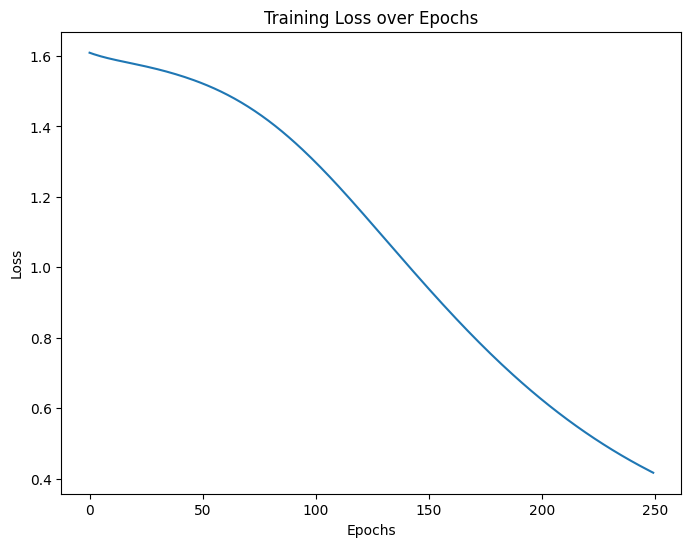

Evaluating the model...
Model accuracy: 97.99%
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
Accuracy: 0.9799
Precision: 0.9799
Recall: 0.9799
F1 Score: 0.9798


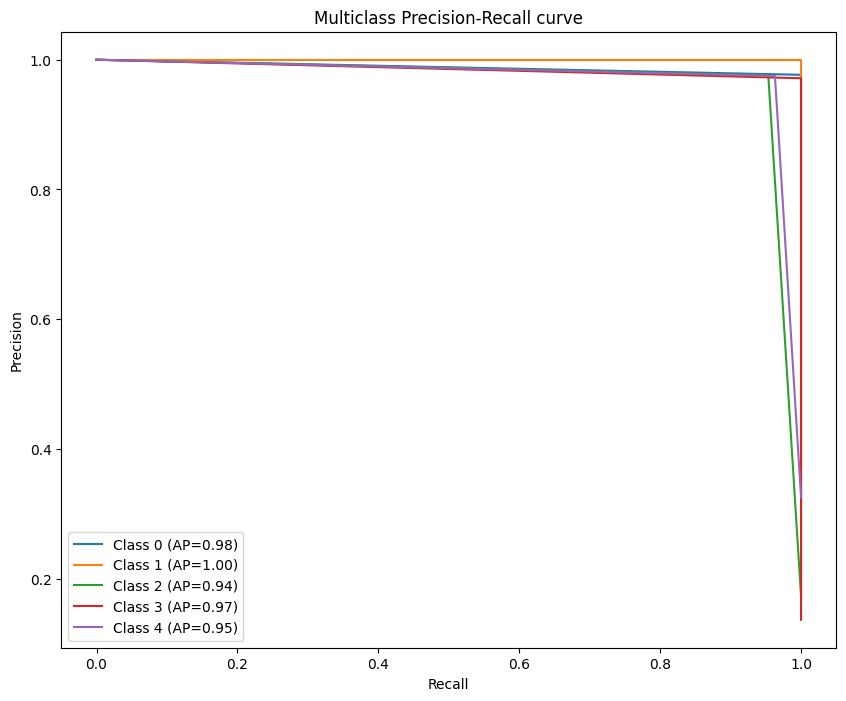

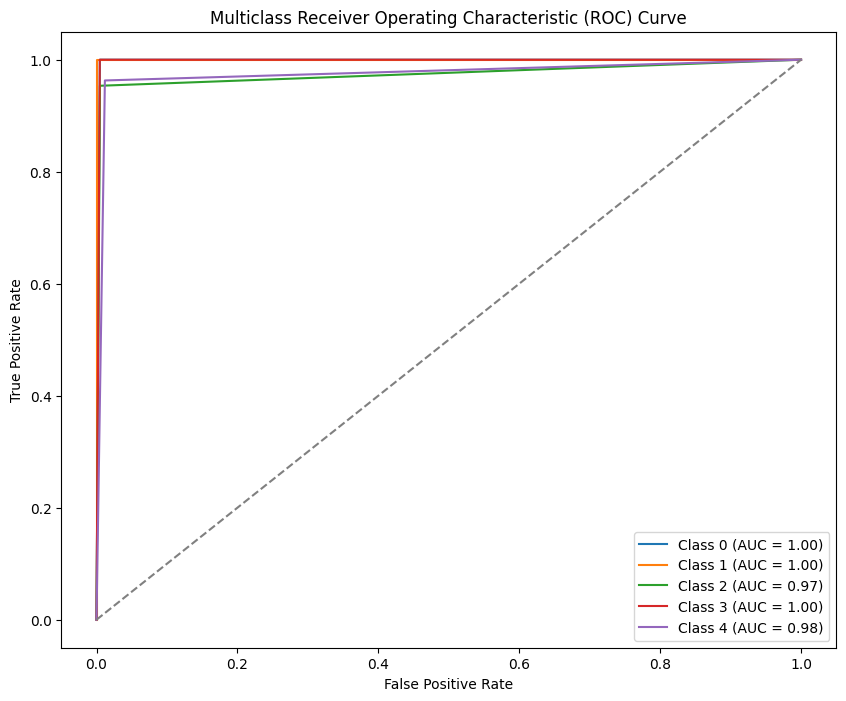

In [23]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Train the model
input_size = X_train.shape[1]  # Number of input features
hidden_size = 64  # Hidden layer size
output_size = len(classes)  # Number of classes
epochs = 250  # Number of epochs for training
learning_rate = 0.01  # Learning rate for gradient descent

# Call the train_ann function to train the model
W1, b1, W2, b2, loss_history = train_ann(X_train, Y_train, input_size, hidden_size, output_size, epochs, learning_rate)

# Optionally, plot the loss history during training
plt.figure(figsize=(8, 6))
plt.plot(loss_history)
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Evaluate the model on the test data
accuracy, precision, recall, f1 = evaluate_model(X_test, Y_test, W1, b1, W2, b2)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Make predictions for the test data
predictions = predict(X_test, W1, b1, W2, b2)

# Plot Precision-Recall curve for multiclass classification
def plot_precision_recall_curve(Y_test, predictions, output_size):
    Y_test_bin = label_binarize(Y_test, classes=[i for i in range(output_size)])
    
    precision = {}
    recall = {}
    average_precision = {}

    for i in range(output_size):
        precision[i], recall[i], _ = precision_recall_curve(Y_test_bin[:, i], predictions == i)
        average_precision[i] = average_precision_score(Y_test_bin[:, i], predictions == i)

    plt.figure(figsize=(10, 8))
    for i in range(output_size):
        plt.plot(recall[i], precision[i], label=f'Class {i} (AP={average_precision[i]:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Multiclass Precision-Recall curve')
    plt.legend(loc='best')
    plt.show()

# Call the function to plot the Precision-Recall curve
plot_precision_recall_curve(Y_test, predictions, output_size)

# Plot ROC curve for multiclass classification
def plot_roc_curve(Y_test, predictions, output_size):
    Y_test_bin = label_binarize(Y_test, classes=[i for i in range(output_size)])
    
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(output_size):
        fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], predictions == i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(output_size):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='best')
    plt.show()

# Call the function to plot the ROC curve
plot_roc_curve(Y_test, predictions, output_size)


In [24]:
# saving Moudule : Saving the Model

In [25]:
import pickle

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump((W1, b1, W2, b2), f)
    print("Model saved to model.pkl")


Model saved to model.pkl


In [26]:
# Loading the Saved Model

In [27]:
# Load the model
with open('model.pkl', 'rb') as f:
    W1, b1, W2, b2 = pickle.load(f)
    print("Model loaded from model.pkl")


Model loaded from model.pkl
